In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
pwd

'C:\\Users\\arvin'

Data collection & analysis

In [2]:
#loding the data frame from csv file to a pandas dataframe
insurance_dataset = pd.read_csv('C:\\Users\\arvin\\Downloads\\insurance.csv')

In [3]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# numberr of rows and columns
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Catrgoriacal Features:
sex
smoker
region

In [5]:
# checking for missing values
insurance_dataset.isnull() .sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data analysis

In [6]:
# statistical mesures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\arvin\anaconda3\e drive\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


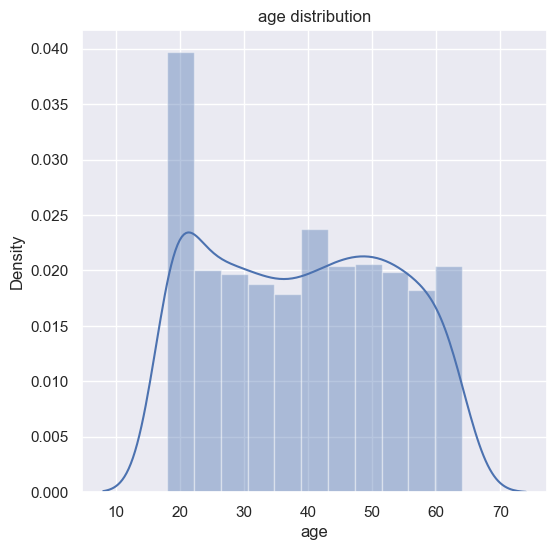

In [7]:
# distribution of the age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('age distribution')
plt.show()

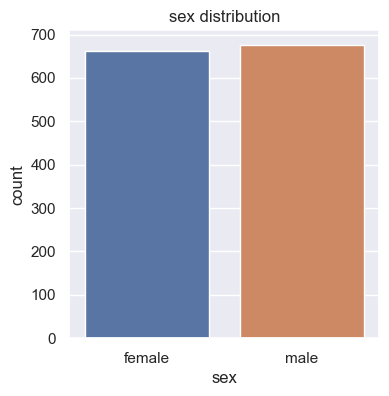

In [13]:
# gender columns
plt.figure(figsize=(4,4))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('sex distribution')
plt.show()

In [16]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [25]:
insurance_dataset.sex.shape

(1338,)

In [26]:
insurance_dataset.sex.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: sex, Length: 1338, dtype: bool

In [27]:
insurance_dataset.sex.unique()

array(['female', 'male'], dtype=object)

In [34]:
insurance_dataset['sex'].isnull().sum()

0

C:\Users\arvin\anaconda3\e drive\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


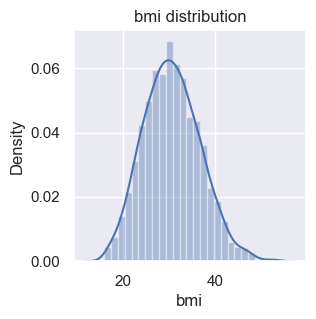

In [35]:
# bmi distribution 
plt.figure(figsize=(3, 3))
sns.distplot(insurance_dataset['bmi'])
plt.title('bmi distribution')
plt.show()

In [37]:
insurance_dataset['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [40]:
insurance_dataset.bmi.isnull() .sum()

0

In [41]:
insurance_dataset.bmi.unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [42]:
insurance_dataset.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

Normal Bmi Range--->18.5 to 24.9

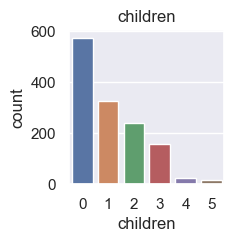

In [45]:
# childern column 
plt.figure(figsize=(2,2))
sns.countplot(x='children', data=insurance_dataset)
plt.title('children')
plt.show()

In [47]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [49]:
insurance_dataset.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [52]:
insurance_dataset.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [53]:
insurance_dataset.children.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: children, Length: 1338, dtype: bool

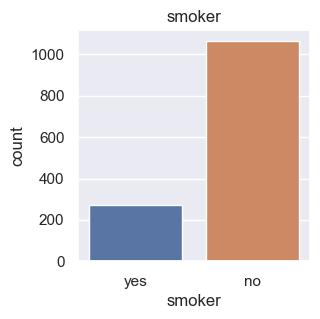

In [54]:
# smoker column 
plt.figure(figsize=(3,3))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [55]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [56]:
insurance_dataset.smoker.describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [57]:
insurance_dataset.smoker.unique()

array(['yes', 'no'], dtype=object)

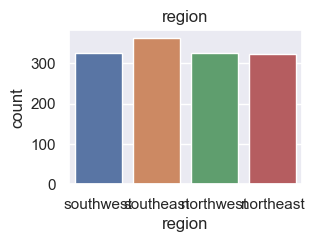

In [63]:
# region columns 
plt.figure(figsize=(3,2))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [65]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [66]:
insurance_dataset.region.describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [69]:
insurance_dataset.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<Figure size 600x600 with 0 Axes>

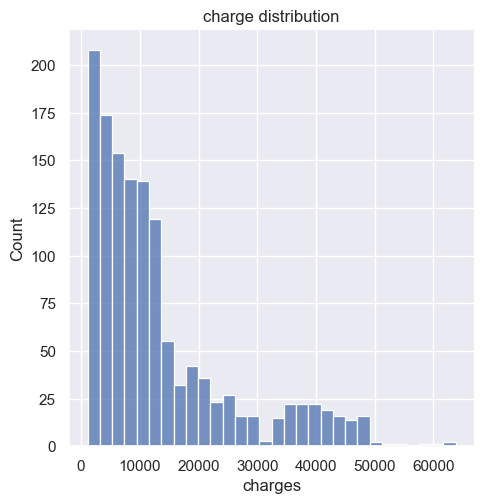

In [70]:
# distribution of charge value
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('charge distribution')
plt.show()

Data pre-processing

Enconding the categorocal features

In [73]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding 'smoler' column 
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region'column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)


spiltting the features andd Target

In [74]:
x = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']

In [75]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [76]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


spillting the dataset into training data and testing data

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


model training

linear regression